# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer: 

a) E[g(x0/theta)] is the expected value over theta of the estimator function which gives the best estimated value for x0. The complete equation represents how much the estimated value (averaged over theta) differs from the actual value(unknown). Since the difference captures how good an average model is, it represents Bias. Variance calculation does not depend on the actual value of the function, it tries to capture how much the estimated value for various theta values differ from the average value(squared).

b) Total Error =bias^2 +variance +irreducible error

We train our models on the training data and validate it using test data. Bias captures the difference between the average value(estimated) and the actual value, i.e., it finds out how good an average model is from the actual values. Variance captures the squared difference between the average value over all the datasets and the actual value for various datasets, i.e., it finds how much the model varies if the dataset is changed.

If the underlying function f(X) is simple, the average model can be quite good, i.e., the bias can be low, and variance can be low as well. However, if we try model this simple function f(X) using many parameters, it tries to fit the irreducible noise as well using these extra parameters i.e., it over fits the model, since noise differs for datasets, the variance can be quite high. 

If the underlying function f(X) is complex, the average model will not be accurate and it underfits the curve, i.e., the bias error can be quite high. If we try model this function f(X) using many parameters, it maybe be able to capture the complexity of the dataset and the variance error can be low. 

The ideal estimator function balances these bias and variance which captures the underlying function well. If we try to oversimplify the underlying function, the bias error will be low, and variance will be high. If we try to over fit the model, the bias can be high while variance can be low. Hence the tradeoff.


# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


A)

In [3]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-5,5,101).reshape(-1,1)

lrp = LinearRegression()

In [4]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    x_train_poly=np.vander(np.squeeze(x_train), 8,increasing=True)
    x_test_poly=np.vander(np.squeeze(x_test), 8,increasing=True)
    x_all_poly=np.vander(np.squeeze(x_all), 8,increasing=True)


    lrp.fit(x_train_poly, y_train)
    train_preds_7= lrp.predict(x_train_poly)
    trainmse_7=mean_squared_error(y_train, train_preds_7)
    test_preds_7= lrp.predict(x_test_poly)
    testmse_7=mean_squared_error(y_test, test_preds_7)
    print("The MSE on training and test set for 7th degree polynomial is "+str(trainmse_7)+',  '+str(testmse_7))
    y_all_pred_7=lrp.predict(x_all_poly)
    
    lrp.fit(x_train_poly[:,0:5], y_train)
    train_preds_4= lrp.predict(x_train_poly[:,0:5])
    trainmse_4=mean_squared_error(y_train, train_preds_4)
    test_preds_4= lrp.predict(x_test_poly[:,0:5])
    testmse_4=mean_squared_error(y_test, test_preds_4)
    print("The MSE on training and test set for 4th degree polynomial is "+str(trainmse_4)+',   '+str(testmse_4))
    y_all_pred_4=lrp.predict(x_all_poly[:,0:5])
    
    
    lrp.fit(x_train_poly[:,0:3], y_train)
    train_preds_2= lrp.predict(x_train_poly[:,0:3])
    trainmse_2=mean_squared_error(y_train, train_preds_2)
    test_preds_2= lrp.predict(x_test_poly[:,0:3])
    testmse_2=mean_squared_error(y_test, test_preds_2)
    print("The MSE on training and test set for 2nd degree polynomial is "+str(trainmse_2)+',   '+str(testmse_2))
    y_all_pred_2=lrp.predict(x_all_poly[:,0:3])
    
    #fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
    #plt.set_size_inches(20, 8)
    #fig.suptitle('Plots with 100 training data points')
    plt.figure(figsize=(15,9))
    plt.scatter( x_train,y_train, label='y_train Vs x_train')
    plt.scatter( x_test,y_test, label='y_test Vs x_test')  
    plt.scatter( x_all,y_all_pred_7, label='all 7th degree')
    plt.scatter( x_all,y_all_pred_4, label='all 4th degree')
    plt.scatter( x_all,y_all_pred_2, label='all 2nd degree')
    plt.scatter( x_test,test_preds_7, label=' test 7th degree')
    plt.scatter( x_test,test_preds_4, label='test 4th degree')
    plt.scatter( x_test,test_preds_2, label='test 2nd degree')
    plt.xlim([-5, 5])
    plt.ylim([-35, 35])
    plt.title('Polynomial fitting')
    plt.legend(loc='best')
    
    return [trainmse_2, trainmse_4, trainmse_7], [testmse_2, testmse_4, testmse_7]

The MSE on training and test set for 7th degree polynomial is 30.67719359210973,  33.41069407768832
The MSE on training and test set for 4th degree polynomial is 31.72001805729006,   31.29208288660673
The MSE on training and test set for 2nd degree polynomial is 247.29679797371534,   320.0640834697785


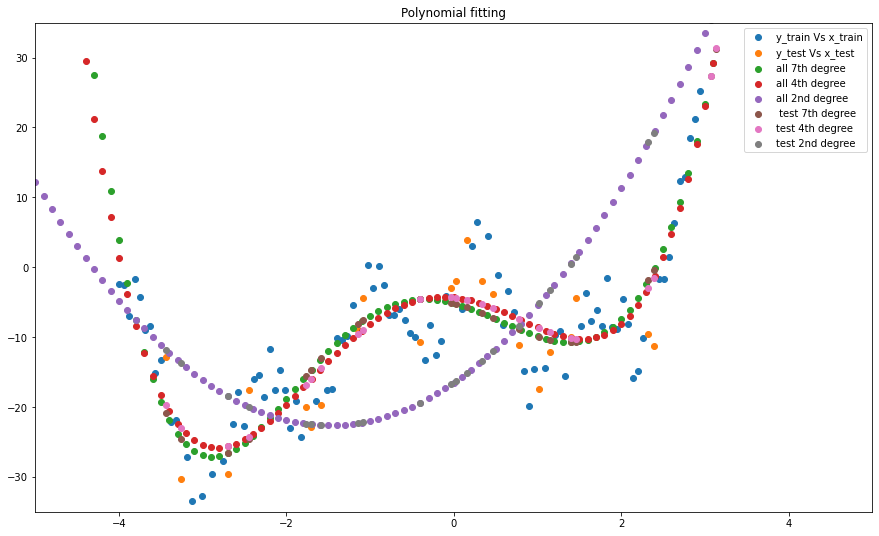

In [5]:
# Fit the different polynomials to the training data and make the plots 

train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

B) The test MSE and training MSE are decreasing with increase in degree of polynomials. Of the three models, the 7th degree polynomial gives the best performance. 
with the second-degree polynomial, the bias is quite high, the variance can be low but is unable to capture the higher order features, hence the high MSE. As we increase the degree, the bias is decreasing, and the variance may increase as the complexity of the model is increased which is coming closer to the true representation of the data and the overall MSE is decreasing as well.


C)

20% data
The MSE on training and test set for 7th degree polynomial is 22.543946691373343,  135.2076452675468
The MSE on training and test set for 4th degree polynomial is 35.115113139129775,   38.34074498344285
The MSE on training and test set for 2nd degree polynomial is 161.17147378830037,   402.3231269099287
40% data
The MSE on training and test set for 7th degree polynomial is 25.49271875165363,  61.2374188455078
The MSE on training and test set for 4th degree polynomial is 31.624529646446895,   33.164282959187396
The MSE on training and test set for 2nd degree polynomial is 150.33251286085704,   405.8051669616574
60% data
The MSE on training and test set for 7th degree polynomial is 26.09908864245442,  60.16667237664975
The MSE on training and test set for 4th degree polynomial is 29.1928057399479,   31.781415416196737
The MSE on training and test set for 2nd degree polynomial is 150.08383759141728,   403.25137848334094
80% data
The MSE on training and test set for 7th degree pol

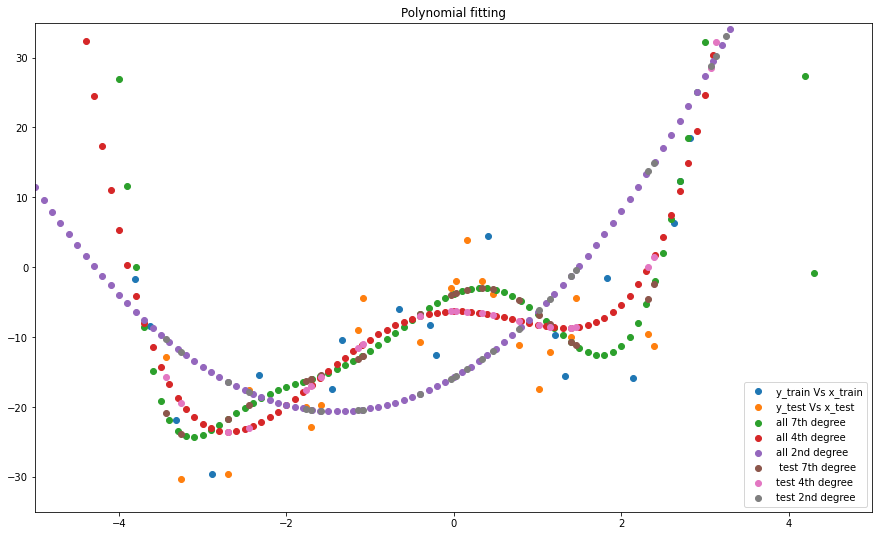

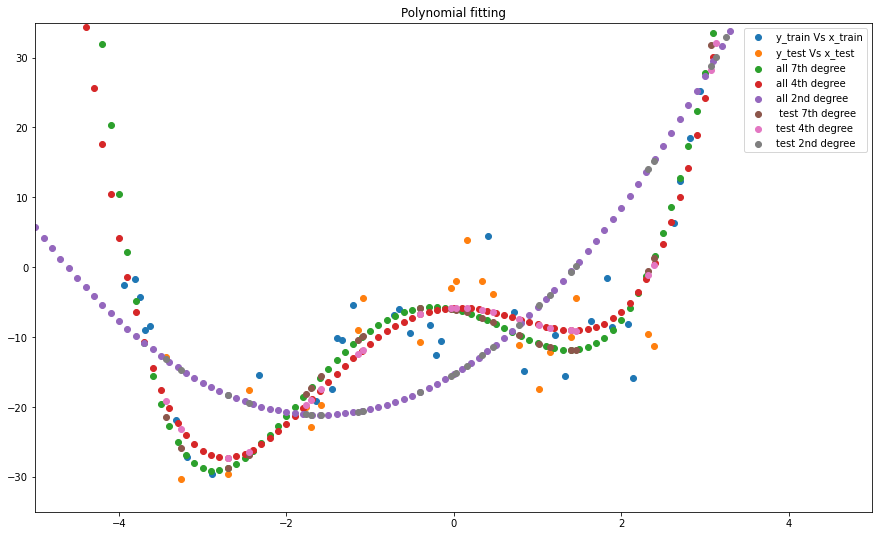

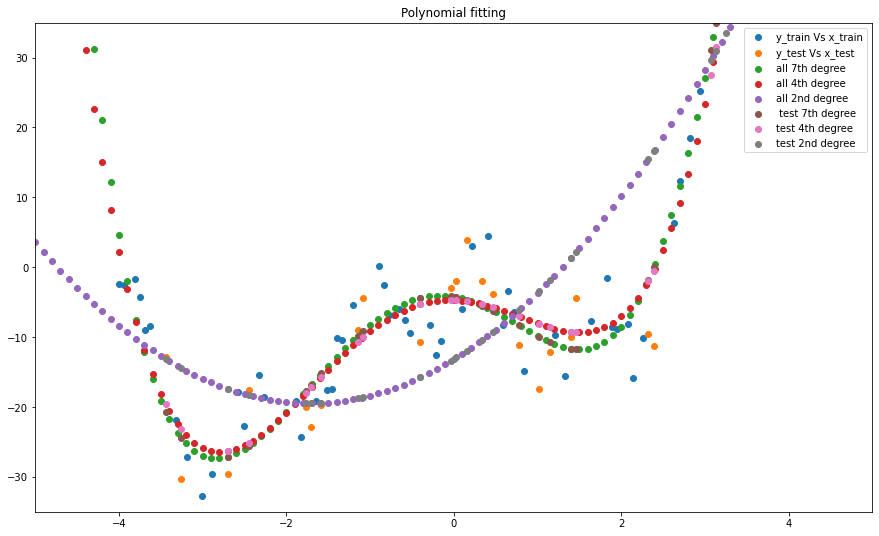

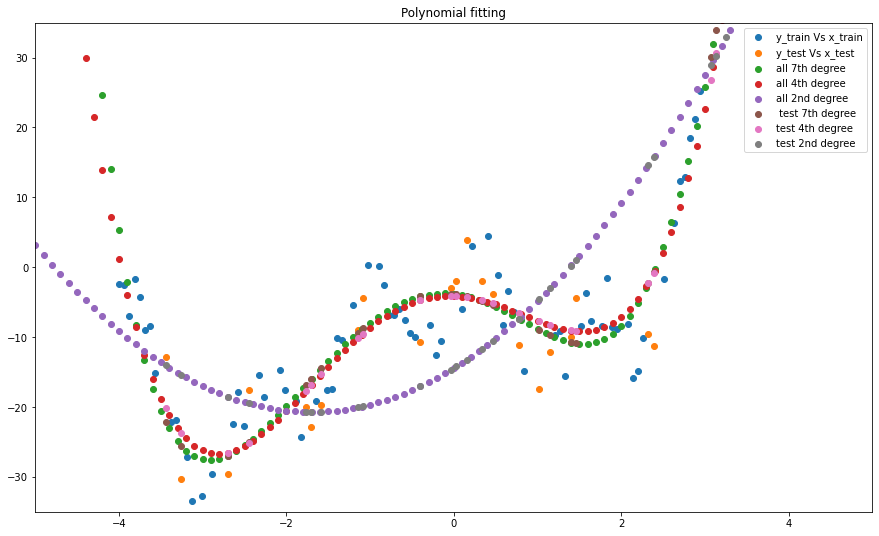

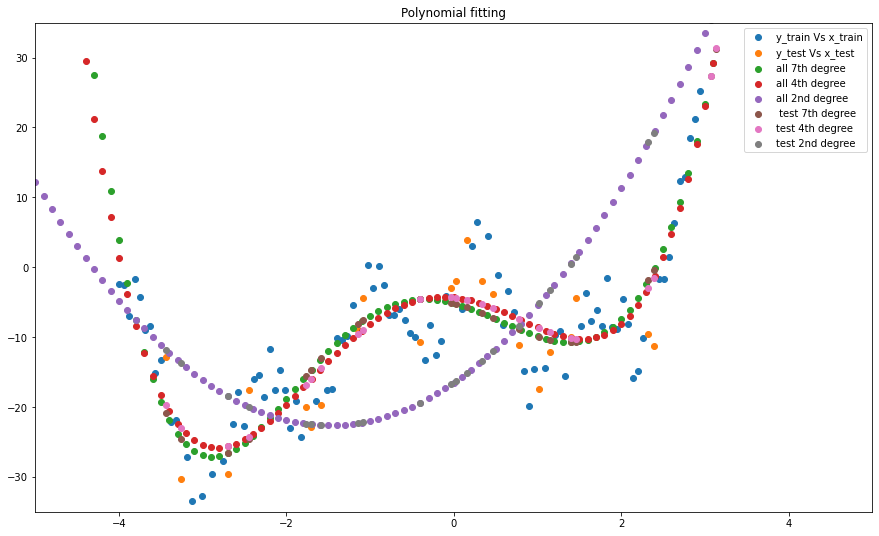

In [6]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

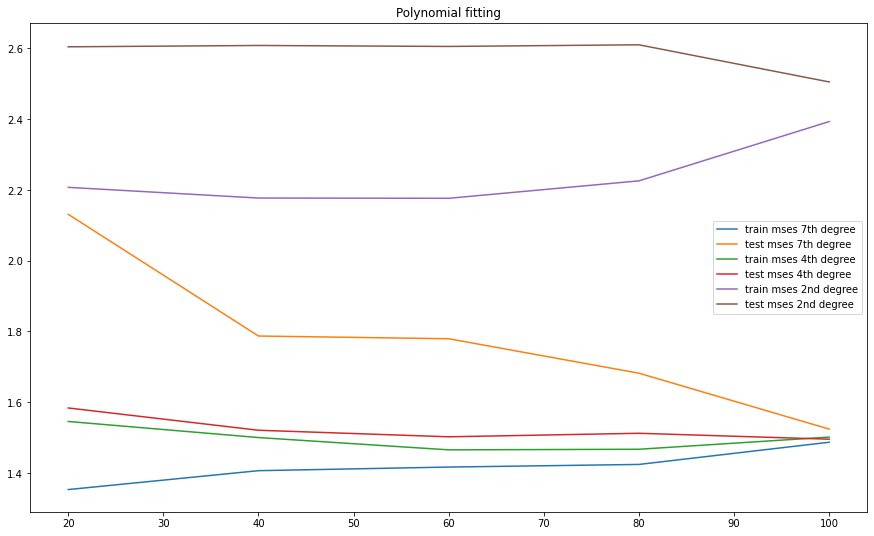

In [7]:
train_rmses_7=[train_rmses_20[2],train_rmses_40[2],train_rmses_60[2],train_rmses_80[2],train_rmses_100[2]]
test_rmses_7=[test_rmses_20[2],test_rmses_40[2],test_rmses_60[2],test_rmses_80[2],test_rmses_100[2]]
train_rmses_4=[train_rmses_20[1],train_rmses_40[1],train_rmses_60[1],train_rmses_80[1],train_rmses_100[1]]
test_rmses_4=[test_rmses_20[1],test_rmses_40[1],test_rmses_60[1],test_rmses_80[1],test_rmses_100[1]]
train_rmses_2=[train_rmses_20[0],train_rmses_40[0],train_rmses_60[0],train_rmses_80[0],train_rmses_100[0]]
test_rmses_2=[test_rmses_20[0],test_rmses_40[0],test_rmses_60[0],test_rmses_80[0],test_rmses_100[0]]
x=[20,40,60,80,100]
plt.figure(figsize=(15,9))
plt.plot( x,np.log10(train_rmses_7), label='train mses 7th degree')
plt.plot( x,np.log10(test_rmses_7), label='test mses 7th degree')
plt.plot( x,np.log10(train_rmses_4), label='train mses 4th degree')
plt.plot( x,np.log10(test_rmses_4), label='test mses 4th degree')
plt.plot( x,np.log10(train_rmses_2), label='train mses 2nd degree')
plt.plot( x,np.log10(test_rmses_2), label='test mses 2nd degree')
plt.title('Polynomial fitting')
plt.legend(loc='best')

2nd degree:
Train mse and test mse are almost similar in values with varying data size. Test mse is more than train mse as expected.
4th degree:
Train and test mse decrease with increase in data size, and Test mse is more than train mse as expected
7th degree:
Test mse decrease with increase in data size, while train mse is almost similar.

Across the polynomial degree, the train mse is decreasing with increase in degree, similar to test mse. This is due to reduction in bias by adding more variables, while the variance increases with increase in variables, the reduction in bias is much larger, so overall error is reducing with increase in degree.

## Answer:

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a) Gradient descent (GD) uses entire training set for optimizing the weights in each iteration whereas stochastic gradient descent (SGD) optimizes the weight by taking one data point in training set at a time (sometimes mini batch). So, GD requires lot of time and computational effort for each iteration compared to SGD.  This problem is exacerbated when the data set is large. At each iteration SGD updates its weights based on one data point, so it adds lot of noise while GD tries for unbiased estimate of the gradients. So, if this noise is large, SGD takes longer time to converge compared to GD. The data points in SGD are picked at random so the updates have high oscillations, and this makes the gradient wider in scope than GD where it is restricted to the well of the point of initialization. This makes GD prone to local minimum, but SGD can converge to global minimum. SGD updates one datapoint at a time, so parallel processing is limited compared to GD, where it can be done efficiently in less time. 

b)  In Nelder-Mead method, we take points (number of dimensions+1) and move in a way away from the largest value. In this way, the points bridge the gap and come closer to the minimum value.

with fixed step size, the solution may not converge to the exact minimum, unless the step size is adaptive. This approach become exponentially tougher with increase in dimensions.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

The error function is assumed to be E= (1/2)$(y-w_0^0 - w_1^0x_1(1) - w_2^0 x_1(1)x_2(1) - w_3^0e^{-x_1(1)})^2$

Let the initial point be $w_0^0, w_1^0, w_2^0, w_3^0$,

the first update of these point using the first data point [$x_1(1),x_2(1),y(1)$] and learning rate n

$w_0^1=w_0^0+n[y(1)-w_0^0 + w_1^0x_1(1) + w_2^0 x_1(1)x_2(1) + w_3^0e^{-x_1(1)}]$

$w_1^1=w_1^0+n[y(1)-w_0^0 + w_1^0x_1(1) + w_2^0 x_1(1)x_2(1) + w_3^0e^{-x_1(1)}]x_1(1)$

$w_2^1=w_2^0+n[y(1)-w_0^0 + w_1^0x_1(1) + w_2^0 x_1(1)x_2(1) + w_3^0e^{-x_1(1)}]x_1(1)x_2(1)$

$w_3^1=w_3^0+n[y(1)-w_0^0 + w_1^0x_1(1) + w_2^0 x_1(1)x_2(1) + w_3^0e^{-x_1(1)}]e^{-x_1(1)}$


This method is used to update at each step using the next data point until the convergence

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [8]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [9]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        self.lowest_mse=0
        
    def sgd(self, gradient):
        #print('gradient')
        #print(gradient)
        self.coef=np.add(self.coef,self.learning_rate*gradient)## = please put your codes here to update the self.coef using SGD
        #print('coef')
        #print(self.coef)
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                #please put your codes here
                error=2*(y[i]-self.coef[0]*X[i,0]-self.coef[1]*X[i,1]-self.coef[2]*X[i,2]-self.coef[3]*X[i,3])
                       
                # Compute gradients
                    #please put your codes here
                gradient=np.zeros(4)
                gradient[0]=error*X[i,0]#- 2*self.regularization*self.coef[0]
                gradient[1]=error*X[i,1]- 1*self.regularization*self.coef[1]
                gradient[2]=error*X[i,2]- 1*self.regularization*self.coef[2]
                gradient[3]=error*X[i,3]- 1*self.regularization*self.coef[3]
                
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            #print(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        #print(mse)
        self.lowest_mse = mse[0]
        for i in mse:
            if i<self.lowest_mse:
                self.lowest_mse=i
        
                
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            
        return self.lowest_mse

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
        return  self.coef[1]*X[:,0]+self.coef[1]*X[:,1]+self.coef[2]*X[:,2]+self.coef[3]*X[:,3]
#this line is just a placeholder, please delete this line in your code        

best mse is  0.0288474217542404
best learning rate is   0.001
best  regularisation paramter is   0
2nd best mse is  0.029067031589701676
2nd best learning rate is   0.01
2nd best  regularisation paramter is   0


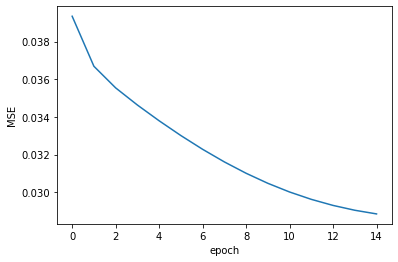

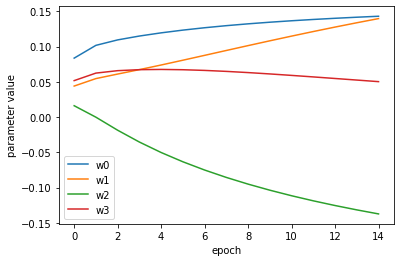

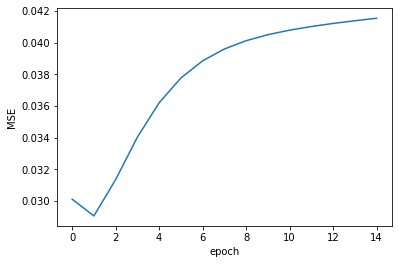

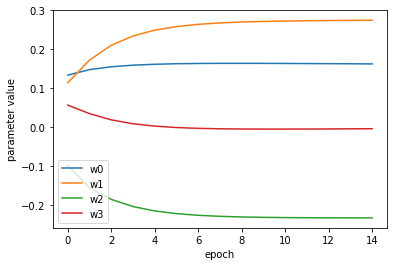

In [11]:
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]
mse_iter=[]
for i in learning_rate:
    for j in regularization:
        #print(i,j)
        rr=Regression(i,j,n_epochs)
        mse_iter.append(rr.fit(X, y,'sgd',False))

#print(mse_iter)
min_mse=np.nanmin(mse_iter)
if np.isnan(min_mse):
    print("Solution did not converge")
    
else:
    min_mse_2nd=float('inf')
    for i in range(len(mse_iter)):
        if min_mse<mse_iter[i]:
            if min_mse_2nd > mse_iter[i]:
                min_mse_2nd = mse_iter[i]
    #print(min_mse_2nd,min_mse)
    for i in range(len(mse_iter)):
        if mse_iter[i]==min_mse:
            index=i
            best_lr=learning_rate[int(index/len(regularization))]
            best_reg=regularization[int(index%len(regularization))]
            print("best mse is  " +str(min_mse))
            print("best learning rate is   "+ str(best_lr))
            print("best  regularisation paramter is   "+ str(best_reg))
            rr=Regression(best_lr,best_reg,n_epochs)
            mse_iter.append(rr.fit(X, y,'sgd',True))       
            break
    
    for i in range(len(mse_iter)):
        if mse_iter[i]==min_mse_2nd:
            index=i
            best_lr=learning_rate[int(index/len(regularization))]
            best_reg=regularization[int(index%len(regularization))]
            print("2nd best mse is  " +str(min_mse_2nd))
            print("2nd best learning rate is   "+ str(best_lr))
            print("2nd best  regularisation paramter is   "+ str(best_reg))
            rr=Regression(best_lr,best_reg,n_epochs)
            mse_iter.append(rr.fit(X, y,'sgd',True))       
            break
    
       
    
